In [ ]:
%matplotlib notebook

In [1]:
from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
#from sklearn.cross_validation import cross_val_score
from sklearn import datasets, linear_model, cross_validation, grid_search
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd

/home/tbacoyannis/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/tbacoyannis/.local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
pca = decomposition.PCA()
RFC= RandomForestClassifier()

estimators = [('reduce_dim', pca), ('Random_Forest', RFC)]
pipe = Pipeline(estimators)

In [3]:
cc=70
nb_tree= 200
random_st= 0


In [4]:
params = dict(reduce_dim__n_components=cc,
              Random_Forest__n_estimators=nb_tree,Random_Forest__random_state=random_st)

In [5]:
%run ./configure.ipynb

In [12]:
filename_FVN =projectpath+'io/Output/FV_N.npy'
FV_N=np.load(filename_FVN)
X=FV_N  #[264:790]
#X=FV_N

In [14]:
X.shape

(1593, 2919)

In [8]:
def Get_true_y(DF):
    y=np.zeros([DF.shape[0]])
    for j in range(0,DF.shape[0]):
        if (DF.TYPE[j]==1):
            y[j]=1
        elif (DF.TYPE[j]==2):
            y[j]=2
        else :
            y[j]=3
        yr=(y.reshape(-1,1)).ravel() 
            #yr = yr.ravel()   
    return(yr)

In [9]:
Data_FRAMES=pd.read_pickle(projectpath+'io/Output/Dataframe_.pkl')

In [10]:
yr=Get_true_y(Data_FRAMES)

In [12]:
#np.save(filename_yr, yr)

In [13]:
yr=np.load(filename_yr)
yr=yr  #[264:790]

In [16]:
X=X[:yr.shape[0]]
X.shape

(1591, 2919)

In [17]:
yr=yr[:X.shape[0]]


(1591,)

In [11]:
filename_yr =projectpath+'io/Output/yr.npy'

In [19]:
np.save(filename_yr, yr)

In [18]:
yr.shape

(1593,)

In [ ]:
yr=np.load(filename_yr)

In [14]:
pca=decomposition.PCA(n_components=70, svd_solver='auto')

In [15]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=70, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
M = pca.transform(X)

In [17]:
RFC=RandomForestClassifier(n_estimators=200, random_state=0)

In [18]:
predictedVAL = cross_val_predict(RFC, X, yr , n_jobs =-1)

In [19]:
metrics.accuracy_score(yr, predictedVAL) 

0.96768060836501901

In [20]:
Conf_Mat=confusion_matrix(yr, predictedVAL)

/home/tbacoyannis/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


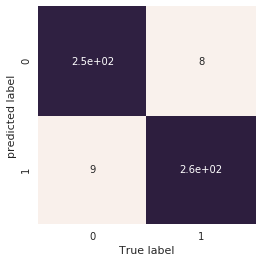

In [21]:

import seaborn as sns
sns.heatmap(Conf_Mat.T, square=True, annot=True, cbar=False)
plt.xlabel('True label')
plt.ylabel('predicted label');

In [22]:
RFC.fit(X, yr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [23]:
filename_FVN_TEST =projectpath+'io/Output/FV_N_TEST.npy'
FV_N_TEST=np.load(filename_FVN_TEST)

In [24]:
FV_N_TEST.shape

(31887, 2919)

In [25]:
lign_nan=np.ones(len(FV_N_TEST))
for i in range(0,len(FV_N_TEST)):
    a=np.isnan(FV_N_TEST[i])
    if np.any(a)==True:
        lign_nan[i]=0

In [27]:
B=np.ones(len(FV_N_TEST))
for i in range(0,len(FV_N_TEST)):
    B[i]=lign_nan[i]*i
    

In [28]:
idx=B #np.argwhere(lign_nan==1)
idx=idx.flatten()

In [29]:
idx=idx.astype(np.int64)


In [30]:
FV_N_TEST=FV_N_TEST[idx]

In [32]:
RFC.predict(FV_N_TEST)

array([ 2.,  2.,  2., ...,  2.,  2.,  2.])

In [33]:
prediction_TEST=RFC.predict(FV_N_TEST)

In [34]:
filename_prediction_TEST =projectpath+'io/Output/prediction_TEST.npy'
prediction_TEST=np.save(filename_prediction_TEST,prediction_TEST)

In [35]:
predict_probability=RFC.predict_proba(FV_N_TEST)

In [36]:
filename_predict_probability=projectpath+'io/Output/predict_probability.npy'
predict_probability=np.save(filename_predict_probability,predict_probability)